In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img

Using TensorFlow backend.


In [2]:
train_dir = '/home/saloni/our_vgg/clean-dataset/train'
validation_dir = '/home/saloni/our_vgg/clean-dataset/test'
image_size = 256

In [3]:
from keras.applications import VGG16

#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)


from keras import models
from keras import layers
from keras import optimizers

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

<keras.engine.topology.InputLayer object at 0x7fd97bac42d0> False
<keras.layers.convolutional.Conv2D object at 0x7fd97bac4510> False
<keras.layers.convolutional.Conv2D object at 0x7fd97ba84a10> False
<keras.layers.pooling.MaxPooling2D object at 0x7fd97ba84f10> False
<keras.layers.convolutional.Conv2D object at 0x7fd97bac4710> False
<keras.layers.convolutional.Conv2D object at 0x7fd97bac4410> False
<keras.layers.pooling.MaxPooling2D object at 0x7fd97ba92ed0> False
<keras.layers.convolutional.Conv2D object at 0x7fd97ba05c50> False
<keras.layers.convolutional.Conv2D object at 0x7fd97b99ebd0> False
<keras.layers.convolutional.Conv2D object at 0x7fd97b9c5f90> False
<keras.layers.pooling.MaxPooling2D object at 0x7fd97b974750> False
<keras.layers.convolutional.Conv2D object at 0x7fd97b937990> False
<keras.layers.convolutional.Conv2D object at 0x7fd97b8f7350> False
<keras.layers.convolutional.Conv2D object at 0x7fd97b904c90> False
<keras.layers.pooling.MaxPooling2D object at 0x7fd97b8b8690> Fa

Found 1485 images belonging to 4 classes.
Found 608 images belonging to 4 classes.
Epoch 1/20
297/297 [==============================] - 256s - loss: 5.3238 - acc: 0.5380 - val_loss: 1.7351 - val_acc: 0.7752
Epoch 2/20
297/297 [==============================] - 252s - loss: 2.1202 - acc: 0.7502 - val_loss: 0.8521 - val_acc: 0.8491
Epoch 3/20
297/297 [==============================] - 250s - loss: 1.2517 - acc: 0.8303 - val_loss: 0.3126 - val_acc: 0.9370
Epoch 4/20
297/297 [==============================] - 254s - loss: 0.8691 - acc: 0.8653 - val_loss: 0.4068 - val_acc: 0.9154
Epoch 5/20
297/297 [==============================] - 251s - loss: 0.7015 - acc: 0.8916 - val_loss: 0.5476 - val_acc: 0.9005
Epoch 6/20
297/297 [==============================] - 251s - loss: 0.5575 - acc: 0.9084 - val_loss: 0.2245 - val_acc: 0.9536
Epoch 7/20
297/297 [==============================] - 250s - loss: 0.5067 - acc: 0.9199 - val_loss: 0.3888 - val_acc: 0.9287
Epoch 8/20
297/297 [======================

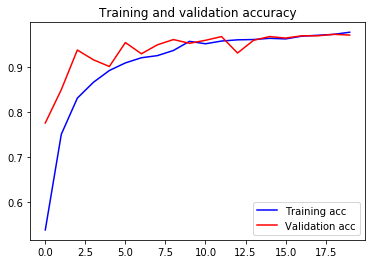

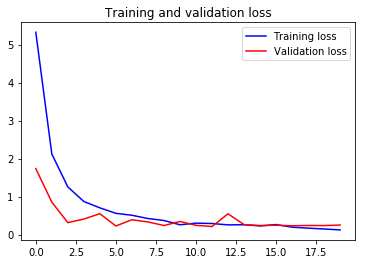

In [4]:
# No Data augmentation 
train_datagen = ImageDataGenerator(rescale=None)
validation_datagen = ImageDataGenerator(rescale=None)

# Change the batchsize according to your system RAM
train_batchsize = 5
val_batchsize = 5

# Data Generator for Training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data Generator for Validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size)

# Save the Model
model.save('all_freezed.h5')

# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()